In [1]:
# # Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 41.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import sklearn
print(sklearn.__version__)

0.24.2


In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# importing Dataset from Local drive
from google.colab import files
Uploaded=files.upload()

Saving Tanishka Kothari - Classification Dataset2.csv to Tanishka Kothari - Classification Dataset2.csv


In [7]:
# Importing the dataset from Google Drive
dataset = pd.read_csv('Tanishka Kothari - Classification Dataset2.csv')

In [8]:
print(dataset)

     Gender  Glucose    BP  SkinThickness  ...   BMI  PedigreeFunction  Age  Outcome
0      Male      148  72.0           35.0  ...  33.6             0.627   50        1
1    Female       85  66.0           29.0  ...  26.6             0.351   31        0
2    Female      183  64.0            0.0  ...  23.3             0.672   32        1
3    Female       89  66.0           23.0  ...  28.1             0.167   21        0
4      Male      137   NaN           35.0  ...  43.1             2.288   33        1
..      ...      ...   ...            ...  ...   ...               ...  ...      ...
559    Male       85  74.0            0.0  ...  30.1             0.300   35        0
560    Male      125  76.0            0.0  ...  33.8             0.121   54        1
561    Male      198  66.0           32.0  ...  41.3             0.502   28        1
562    Male       87  68.0           34.0  ...  37.6             0.401   24        0
563    Male       99  60.0           19.0  ...  26.9             

In [9]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(564, 9)


In [10]:
#Print Imformation about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            564 non-null    object 
 1   Glucose           564 non-null    int64  
 2   BP                548 non-null    float64
 3   SkinThickness     553 non-null    float64
 4   Insulin           552 non-null    float64
 5   BMI               547 non-null    float64
 6   PedigreeFunction  546 non-null    float64
 7   Age               564 non-null    int64  
 8   Outcome           564 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 39.8+ KB


In [11]:
dataset.isnull().sum()

Gender               0
Glucose              0
BP                  16
SkinThickness       11
Insulin             12
BMI                 17
PedigreeFunction    18
Age                  0
Outcome              0
dtype: int64

In [12]:
dataset.describe()

,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunction,Age,Outcome
count,564.000000,548.000000,553.000000,552.000000,547.000000,546.000000,564.000000,564.000000
mean,120.239362,68.768248,20.618445,80.009058,31.830896,0.481267,33.292553,0.349291
std,32.763176,19.279507,15.628644,116.936865,8.111669,0.337244,11.818696,0.477169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,64.000000,0.000000,0.000000,27.050000,0.248250,24.000000,0.000000
50%,116.000000,70.000000,23.000000,37.500000,32.000000,0.388500,29.000000,0.000000
75%,140.250000,78.500000,32.000000,120.500000,36.550000,0.646500,40.000000,1.000000
max,198.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:, 2:4].values
# Extracting dependent variable:
y = dataset.iloc[:, 4].values


In [14]:
print(X)

[[72. 35.]
 [66. 29.]
 [64.  0.]
 ...
 [66. 32.]
 [68. 34.]
 [60. 19.]]


In [15]:
print(y)

[  0.   0.   0.  94. 168.   0.  88.   0. 543.   0.   0.   0.   0. 846.
 175.   0. 230.   0.  83.  96. 235.   0.   0.   0. 146. 115.   0. 140.
 110.   0.   0. 245.  54.   0.   0. 192.   0.   0.   0. 207.  70.   0.
   0. 240.   0.   0.   0.   0.   0.   0.  82.  36.  23. 300. 342.   0.
 304. 110.   0. 142.   0.   0.   0.  nan   0.   0.   0.   0.  38. 100.
  90. 140.  nan 270.   0.   0.   0.   0.  nan  nan   0.   0.  71.   0.
   0. 125.   0.  71. 110.   0.   0. 176.  48.   0.  64.  nan   0.  76.
  64. 220.   0.   0.   0.  40.   0. 152.   0. 140.  18.  36. 135. 495.
  37.   0.  nan   0.   0.   0.   0.  51. 100.   0. 100.   0.   0.  99.
 135.  94. 145.   0. 168.   0. 225.   0.  49. 140.  50.  92.   0. 325.
   0.   0.  63.   0. 284.   0.   0. 119.   0.   0. 204.   0. 155. 485.
   0.   0.  94. 135.  53. 114.   0. 105. 285.   0.   0. 156.   0.   0.
   0.  78.   0. 130.   0.  48.  55. 130.   0. 130.   0.   0.   0.  92.
  23.   0.   0.   0. 495.  58. 114. 160.   0.  94.   0.   0.   0. 210.
   0. 

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

In [17]:
print(X_train)

[[ 74.  32.]
 [ 70.  38.]
 [ 60.  22.]
 [ 68.  30.]
 [ 90.  12.]
 [ 64.   0.]
 [ 80.  25.]
 [ 72.  32.]
 [ 68.  20.]
 [ 78.  26.]
 [ 66.   0.]
 [108.   0.]
 [ 68.  14.]
 [ 82.  43.]
 [ 64.  41.]
 [ 76.  15.]
 [ 88.  60.]
 [ 84.  21.]
 [ 70.  14.]
 [ 64.  23.]
 [ 58.  33.]
 [ 70.  15.]
 [ 72.  30.]
 [ 80.  33.]
 [ 90.  39.]
 [ 72.   0.]
 [ 62.  41.]
 [ 60.  23.]
 [ 66.  32.]
 [ 80.  45.]
 [ 66.  nan]
 [ 70.  32.]
 [ 78.  25.]
 [ 86.  28.]
 [  0.   0.]
 [  0.   0.]
 [ 76.  nan]
 [ 70.   0.]
 [ 90.   0.]
 [  0.   0.]
 [ 82.  28.]
 [ 70.   0.]
 [ 88.   0.]
 [ 64.  25.]
 [  0.   0.]
 [ 60.  29.]
 [ nan   0.]
 [ 82.  40.]
 [ 74.  11.]
 [ 72.  12.]
 [ 70.  40.]
 [ 70.   0.]
 [ 78.  25.]
 [ 84.  47.]
 [  0.   0.]
 [  0.   0.]
 [ 90.  27.]
 [ 78.  34.]
 [ 75.   0.]
 [ 76.   0.]
 [ 72.  17.]
 [ 56.  30.]
 [  0.   0.]
 [104.  25.]
 [ 50.  15.]
 [ 84.  21.]
 [ 74.  29.]
 [ 74.   0.]
 [ 66.  nan]
 [ 62.  17.]
 [ 84.   0.]
 [ 68.  nan]
 [ 82.  18.]
 [ 64.  37.]
 [ 70.  52.]
 [ 78.  32.]
 [ 76.   0.]

In [18]:
print(X_test)

[[ 62.   0.]
 [ 54.  13.]
 [  0.  23.]
 [ 70.  26.]
 [ 74.  26.]
 [ 60.   0.]
 [ 86.  39.]
 [ 76.  29.]
 [ 60.  18.]
 [ 76.  35.]
 [ 85.  54.]
 [ 72.  28.]
 [ 56.  29.]
 [ 54.  28.]
 [ 86.  37.]
 [ 60.  18.]
 [ 72.  33.]
 [ 62.   0.]
 [ 78.  30.]
 [ 66.  23.]
 [ 84.   0.]
 [ 66.  23.]
 [ 68.  22.]
 [ 76.   0.]
 [ nan  37.]
 [ 88.  37.]
 [ 88.   0.]
 [ 70.  32.]
 [ 74.  19.]
 [ 82.  42.]
 [ 52.  26.]
 [ 82.   0.]
 [ 76.   0.]
 [ 92.   0.]
 [ 66.  20.]
 [102.  28.]
 [ 72.  35.]
 [ 68.  19.]
 [ 82.  32.]
 [ 85.  25.]
 [ 60.  19.]
 [ 70.   0.]
 [ 76.   0.]
 [ 62.  18.]
 [ 55.   0.]
 [ 78.  37.]
 [ 74.   0.]
 [ 62.  41.]
 [ 64.  19.]
 [ 84.   0.]
 [ 62.  26.]
 [ 72.   0.]
 [ 68.  38.]
 [ 50.  32.]
 [ 78.  39.]
 [110.  46.]
 [ 86.   0.]
 [ 76.  28.]
 [ 70.  30.]
 [ 60.  33.]
 [ 74.   0.]
 [ 64.  23.]
 [ 60.  37.]
 [ 78.  41.]
 [ 84.  41.]
 [ 72.  25.]
 [ 80.  35.]
 [ 58.   0.]
 [ 76.  36.]
 [ 68.  13.]
 [ 68.  23.]
 [ 66.  31.]
 [ 65.   0.]
 [ 68.  18.]
 [ 75.  30.]
 [ 58.  11.]
 [ 68.  21.]

In [19]:
print(y_test)

[  0.  50.   0. 115.  nan   0. 220. 280.  58. 194.   0.   0. 152. 105.
   0.   0.   0.   0.   0.  94.   0.  50.   0.   0.   0.   0.   0.  66.
  53. 485.  63.   0.   0.   0.  90. 140.   0. 180.   0.  36.  54.   0.
   0.  59.   0. 182.   0. 480.  82.   0. 495.   0.   0.  88. 277. 130.
   0. 122. 135. 190.   0.   0.  75. 140.  88. 190. 160.   0. 245.  49.
  81. 188.   0.  76.   0.  54. 166.  76. 145.   0. 231.   0. 110. 156.
 140.  75. 110. 135.  nan   0. 130.   0. 120.   0. 293.   0.  95.   0.
  71.  96.  64.   0.   0. 115.   0.   0.   0.  nan 182. 285.  56.  83.
   0.   0. 265.   0.   0. 119.  38. 207. 155.  66.  40.   0.   0.  nan
  50.  86. 120.   0. 145. 249.  48.  64.   0.   0.   0.   0.  44. 120.
   0.]


In [20]:
print(y_train)

[193.   0.   0. 106.  78.   0.  37.   0.   0.  71.   0.   0. 148.  67.
 142.  51. 110. 192. 168.  89. 135.   0. 176. 130.   0.   0. 129. 846.
   0.  92.  nan  88. 184. 155.   0.   0.   0.   0.  nan   0.   0.   0.
   0.  70.   0. 478.   0.   0.  60.  87. 271.   0.   0. 230.   0.   0.
   0. 171.   0.   0.   0.  nan   0.   0.  36.   0.   0.   0.   0. 210.
   0.   0.  64. 225.  57. 210.   0.  76. 176.  56. 148.   0.   0.   0.
   0.   0.   0. 175.   0. 140. 105.   0.  94.   0. 106.   0.  90.   0.
   0. 285.  63.  49. 465. 114.   0. 100.  nan 415.   0.   0.  58. 105.
   0.  99.   0.   0.  55.   0.  18. 342. 402.   0.   0. 328.  36.  79.
 130. 191.   0.   0.  94.  nan 495.   0.   0.  54.  56.   0.   0.   0.
 204. 325.   0.   0.   0.   0. 250. 325. 474. 360. 326.   0.   0.   0.
   0.   0.   0.   0.   0.  nan   0.   0.   0. 110. 255. 108.  48.   0.
   0. 122.  67. 170. 237.   0. 274.   0.   0.   0.  55. 235.   0. 115.
   0.  66. 205. 180.  52. 145.   0.   0.  87.   0. 155. 168.   0.   0.
   0. 

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
print(X_train)

[[ 0.28049324  0.70403077]
 [ 0.07766744  1.07806131]
 [-0.42939706  0.08064655]
 [-0.02374546  0.57935393]
 [ 1.09179644 -0.54273767]
 [-0.22657126 -1.29079874]
 [ 0.58473194  0.26766182]
 [ 0.17908034  0.70403077]
 [-0.02374546 -0.04403029]
 [ 0.48331904  0.33000024]
 [-0.12515836 -1.29079874]
 [ 2.00451254 -1.29079874]
 [-0.02374546 -0.41806083]
 [ 0.68614484  1.38975342]
 [-0.22657126  1.26507658]
 [ 0.38190614 -0.3557224 ]
 [ 0.99038354  2.4495066 ]
 [ 0.78755774  0.01830813]
 [ 0.07766744 -0.41806083]
 [-0.22657126  0.14298497]
 [-0.53080996  0.7663692 ]
 [ 0.07766744 -0.3557224 ]
 [ 0.17908034  0.57935393]
 [ 0.58473194  0.7663692 ]
 [ 1.09179644  1.14039973]
 [ 0.17908034 -1.29079874]
 [-0.32798416  1.26507658]
 [-0.42939706  0.14298497]
 [-0.12515836  0.70403077]
 [ 0.58473194  1.51443026]
 [-0.12515836         nan]
 [ 0.07766744  0.70403077]
 [ 0.48331904  0.26766182]
 [ 0.88897064  0.45467709]
 [-3.47178405 -1.29079874]
 [-3.47178405 -1.29079874]
 [ 0.38190614         nan]
 

In [26]:
print(X_test)

[[-0.32798416 -1.29079874]
 [-0.73363576 -0.48039925]
 [-3.47178405  0.14298497]
 [ 0.07766744  0.33000024]
 [ 0.28049324  0.33000024]
 [-0.42939706 -1.29079874]
 [ 0.88897064  1.14039973]
 [ 0.38190614  0.51701551]
 [-0.42939706 -0.16870714]
 [ 0.38190614  0.89104604]
 [ 0.83826419  2.07547607]
 [ 0.17908034  0.45467709]
 [-0.63222286  0.51701551]
 [-0.73363576  0.45467709]
 [ 0.88897064  1.01572289]
 [-0.42939706 -0.16870714]
 [ 0.17908034  0.7663692 ]
 [-0.32798416 -1.29079874]
 [ 0.48331904  0.57935393]
 [-0.12515836  0.14298497]
 [ 0.78755774 -1.29079874]
 [-0.12515836  0.14298497]
 [-0.02374546  0.08064655]
 [ 0.38190614 -1.29079874]
 [        nan  1.01572289]
 [ 0.99038354  1.01572289]
 [ 0.99038354 -1.29079874]
 [ 0.07766744  0.70403077]
 [ 0.28049324 -0.10636872]
 [ 0.68614484  1.327415  ]
 [-0.83504866  0.33000024]
 [ 0.68614484 -1.29079874]
 [ 0.38190614 -1.29079874]
 [ 1.19320934 -1.29079874]
 [-0.12515836 -0.04403029]
 [ 1.70027384  0.45467709]
 [ 0.17908034  0.89104604]
 

In [41]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: ignored

In [42]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

ValueError: ignored

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 96.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


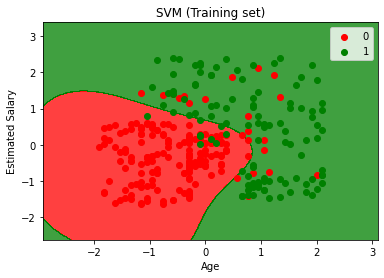

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0,probability=True)
classifier.fit(X_train, y_train)

NameError: ignored

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 74.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


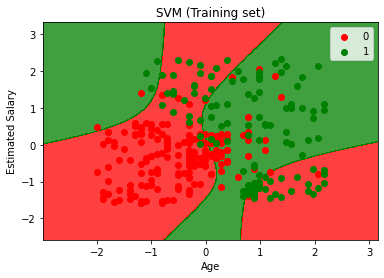

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()